https://mobaku.jp/covid-19/  
の人口変動分析を可視化したい。

```
モバイル空間統計では全国主要エリアの15時時点の人口増減率を日次で掲載します。
各都道府県から特定地域の増減率、およびその関連データをダウンロードすることができます。（毎日19時頃更新）
```

In [1]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt

Duplicate key in file PosixPath('/usr/local/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc'), line 258 ('font.family : Hiragino sans')


In [2]:
df = pd.read_csv('https://mobaku.jp/covid-19/download/%E5%A2%97%E6%B8%9B%E7%8E%87%E4%B8%80%E8%A6%A7.csv', encoding='sjis')


In [3]:
df.rename(columns={
     '各日15時時点増減率(%)' : '比率種別'
}, inplace=True)

In [4]:
df.head()

,エリア,メッシュ,比率種別,2020/05/01,2020/05/02,2020/05/03,2020/05/04,2020/05/05,2020/05/06,2020/05/07,...,2021/07/12,2021/07/13,2021/07/14,2021/07/15,2021/07/16,2021/07/17,2021/07/18,2021/07/19,2021/07/20,2021/07/21
0,北海道 札幌駅,644142881,感染拡大前比,-58.0,-74.0,-78.0,-74.8,-75.0,-74.9,-54.8,...,-5.4,-9.1,-9.5,-7.8,-5.4,10.7,4.8,-7.3,-8.1,-2.8
1,北海道 札幌駅,644142881,緊急事態宣言前比,-54.4,-75.4,-79.2,-76.2,-76.3,-76.2,-50.9,...,2.9,-1.2,-1.6,0.2,2.8,4.7,-0.8,0.8,-0.1,5.7
2,北海道 札幌駅,644142881,前年同月比,-62.5,-79.8,-82.9,-80.4,-80.6,-80.5,-59.6,...,2.7,-1.4,-1.8,0.1,2.7,5.9,0.3,0.6,-0.2,5.5
3,北海道 札幌駅,644142881,前日比,-2.2,-46.1,-15.4,14.5,-0.7,0.4,106.9,...,7.8,-4.0,-0.4,1.9,2.6,1.8,-5.3,1.6,-0.8,5.7
4,北海道 すすきの,644142683,感染拡大前比,-50.6,-64.4,-71.4,-72.5,-71.9,-71.0,-48.7,...,-28.0,-29.7,-29.0,-26.2,-22.9,-22.4,-35.5,-28.5,-28.2,-25.5


### データの仕様の推測

データの仕様は明示的に書かれていないが、以下のようになっていると推測される。
銀座とか（平日と休日とで人口が大きく違うスポット）がわかりやすい

* 感染拡大前比：平日は感染拡大前の平日に対する比率。休日は感染拡大前の休日に対する比率。平日休日の区別あり。 おそらく2020/1/18(土)～2020/2/14(金)4週間 を取っている。（https://mobaku.jp/covid-19/archive/kantokoshinetsu.html）
* 前年同月比：平日は感染拡大前の平日に対する比率。休日は感染拡大前の休日に対する比率。平日休日の区別あり。 
* 緊急事態宣言前比：ある一定値に対する比率。平日休日の区別なし。
* 前日比：字のまま。平日休日の区別なし。

比率だけで基準値が無いんだが……  
平日休日の区別なく人数がわかるのは「緊急事態宣言前比」「前日比」の2つ。   
「前日比」で累積の掛け算をして求めることも可能だが、基準値をどうするかが難しい。
「緊急事態宣言前比」を使おう。

In [5]:
# エリアを変えて実行する場合はここ以降のセルを順次実行で良い

area = "東京都 新宿駅"
# area = "東京都 渋谷センター街"
# area = "東京都 霞が関"
# area = "東京都 東京駅"
# area = "東京都 羽田空港 第1ターミナル"

# area = "大阪府 梅田"


In [6]:
df.query('エリア == @area  & 比率種別 == "緊急事態宣言前比"')

,エリア,メッシュ,比率種別,2020/05/01,2020/05/02,2020/05/03,2020/05/04,2020/05/05,2020/05/06,2020/05/07,...,2021/07/12,2021/07/13,2021/07/14,2021/07/15,2021/07/16,2021/07/17,2021/07/18,2021/07/19,2021/07/20,2021/07/21
117,東京都 新宿駅,533945263,緊急事態宣言前比,-55.8,-68.0,-73.6,-72.3,-72.0,-71.8,-47.2,...,27.2,26.4,26.2,27.9,35.1,62.4,50.3,24.5,27.8,31.0


In [7]:
area_data = df.query('エリア == @area & 比率種別 == "緊急事態宣言前比"')

In [8]:
# 最初3列は数値ではないので除外
df_pop = area_data.iloc[:, 3:]

In [9]:
df_pop = df_pop.T
df_pop.columns = ['population']
df_pop['population'] += 100


In [10]:
df_pop

,population
2020/05/01,44.2
2020/05/02,32.0
2020/05/03,26.4
2020/05/04,27.7
2020/05/05,28.0
...,...
2021/07/17,162.4
2021/07/18,150.3
2021/07/19,124.5
2021/07/20,127.8


In [11]:
df_pop.index
# これは日付型じゃない!

Index(['2020/05/01', '2020/05/02', '2020/05/03', '2020/05/04', '2020/05/05',
       '2020/05/06', '2020/05/07', '2020/05/08', '2020/05/09', '2020/05/10',
       ...
       '2021/07/12', '2021/07/13', '2021/07/14', '2021/07/15', '2021/07/16',
       '2021/07/17', '2021/07/18', '2021/07/19', '2021/07/20', '2021/07/21'],
      dtype='object', length=447)

In [12]:
df_pop.index = pd.to_datetime(df_pop.index)
df_pop.index
# 日付型になった。

DatetimeIndex(['2020-05-01', '2020-05-02', '2020-05-03', '2020-05-04',
               '2020-05-05', '2020-05-06', '2020-05-07', '2020-05-08',
               '2020-05-09', '2020-05-10',
               ...
               '2021-07-12', '2021-07-13', '2021-07-14', '2021-07-15',
               '2021-07-16', '2021-07-17', '2021-07-18', '2021-07-19',
               '2021-07-20', '2021-07-21'],
              dtype='datetime64[ns]', length=447, freq=None)

<AxesSubplot:>

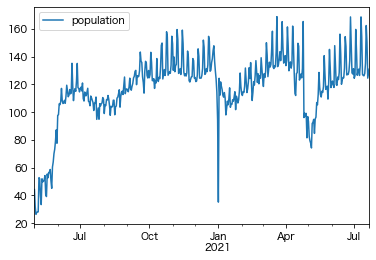

In [13]:
df_pop.plot()

* 第3波以降くらいに絞る
* 平日と休日で線を分ける
* 緊急事態宣言の区間で背景色を分ける
* 1ヶ月ごとに縦線を入れたい
* グラフのサイズ変更
* できればseabornでできないかなぁ

## 第3波以降くらいに絞る
2020年11月以降

In [14]:
df_pop['date'] = pd.to_datetime(df_pop.index)

In [15]:
df_pop.dtypes

population           float64
date          datetime64[ns]
dtype: object

In [16]:
start_date = datetime.datetime(2020, 11, 1)
end_date = datetime.datetime(2021, 7, 21)

In [17]:
df_pop = df_pop.query('@start_date <= date <= @end_date').copy()

## 平日と休日で線を分ける

In [18]:
# df_pop['date']は文字列ではなく、 datetime64[ns]


In [19]:
# これは引数が文字列なので、datetime型に対しては使えない。
def calc_day_of_week(date_str):
    date_dt = datetime.datetime.strptime(date_str, '%Y/%m/%d')
    return date_dt.strftime('%a') # 曜日の英語短縮名

In [20]:
df_pop['dow'] = df_pop['date'].apply(lambda x: x.dayofweek)
# 月火水木金土日 = 0123456

In [21]:
df_pop['weekend'] = (df_pop['dow'] == 5) | (df_pop['dow'] == 6)

In [22]:
df_pop.head()

,population,date,dow,weekend
2020-11-01,149.3,2020-11-01,6,True
2020-11-02,130.1,2020-11-02,0,False
2020-11-03,139.7,2020-11-03,1,False
2020-11-04,129.1,2020-11-04,2,False
2020-11-05,133.5,2020-11-05,3,False


In [23]:
# 祝日は一旦考慮しない
df_pop['pop_weekend'] = df_pop['population'].where(df_pop['weekend'])
df_pop['pop_weekday'] = df_pop['population'].where(~df_pop['weekend'])


In [24]:
df_pop.head()

,population,date,dow,weekend,pop_weekend,pop_weekday
2020-11-01,149.3,2020-11-01,6,True,149.3,NaN
2020-11-02,130.1,2020-11-02,0,False,NaN,130.1
2020-11-03,139.7,2020-11-03,1,False,NaN,139.7
2020-11-04,129.1,2020-11-04,2,False,NaN,129.1
2020-11-05,133.5,2020-11-05,3,False,NaN,133.5


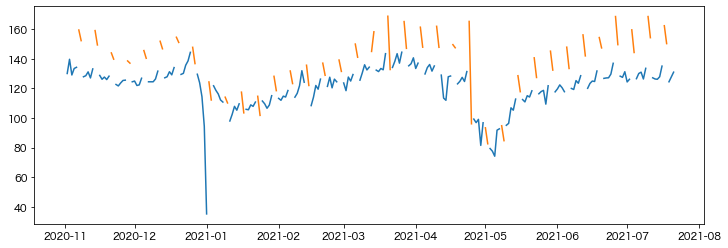

In [25]:
fig, ax = plt.subplots(figsize=(12,4))

ax.plot(df_pop['pop_weekday'])
ax.plot(df_pop['pop_weekend'])

# 線をつなげたければ、多分、プロットの該当日だけ抜き出したSeriesを別個に作るか、もしくはNaNを切らずにつなぐオプションにするか、の2択だと思う。

## 緊急事態宣言の区間で背景色を分ける

グラフの一部の背景色を変える

https://stackoverflow.com/questions/54977900/python-matplotlib-create-graph-with-changing-background-colors  
fill_between() 使い方よくわからん

https://stackoverflow.com/questions/58218292/matplotlib-match-background-color-plot-to-pandas-column-values  
https://stackoverflow.com/questions/46961465/different-background-colour-areas-on-matplotlib-plot  
https://bunsekikobako.com/axvspan-and-axhspan/  
axvspan(横方向で範囲を指定する場合)、axhspan(縦方向で範囲を指定する場合)


In [26]:
df_pop.index

DatetimeIndex(['2020-11-01', '2020-11-02', '2020-11-03', '2020-11-04',
               '2020-11-05', '2020-11-06', '2020-11-07', '2020-11-08',
               '2020-11-09', '2020-11-10',
               ...
               '2021-07-12', '2021-07-13', '2021-07-14', '2021-07-15',
               '2021-07-16', '2021-07-17', '2021-07-18', '2021-07-19',
               '2021-07-20', '2021-07-21'],
              dtype='datetime64[ns]', length=263, freq=None)

In [27]:
def interval_tokyo(ax):
    # 2回目の緊急事態宣言 1/8 〜 3/21
    start_datetime = datetime.datetime(2021, 1,8)
    end_datetime = datetime.datetime(2021, 3,22)
    ax.axvspan(start_datetime, end_datetime, color="red", alpha=0.3)

    # まん延防止等重点措置 4/12 〜 4/24
    start_datetime = datetime.datetime(2021, 4, 12)
    end_datetime = datetime.datetime(2021, 4, 25)
    ax.axvspan(start_datetime, end_datetime, color="yellow", alpha=0.3)

    # 3回目の緊急事態宣言 4/25 〜 6/20
    start_datetime = datetime.datetime(2021, 4, 25)
    end_datetime = datetime.datetime(2021, 6, 21)
    ax.axvspan(start_datetime, end_datetime, color="red", alpha=0.3)

    # まん延防止等重点措置 6/21 〜 7/11
    start_datetime = datetime.datetime(2021, 6, 21)
    end_datetime = datetime.datetime(2021, 7, 12)
    ax.axvspan(start_datetime, end_datetime, color="yellow", alpha=0.3)

    # 4回目の緊急事態宣言 7/12 〜 8/22 とりあえず7月いっぱいを図示
    start_datetime = datetime.datetime(2021, 7, 12)
    end_datetime = datetime.datetime(2021, 8, 1)
    ax.axvspan(start_datetime, end_datetime, color="red", alpha=0.3)

In [28]:
def interval_osaka(ax):
    # 2回目の緊急事態宣言 1/8 〜 2/28
    start_datetime = datetime.datetime(2021, 1,8)
    end_datetime = datetime.datetime(2021, 3, 1)
    ax.axvspan(start_datetime, end_datetime, color="red", alpha=0.3)

    # まん延防止等重点措置 4/5 〜 4/24
    start_datetime = datetime.datetime(2021, 4, 5)
    end_datetime = datetime.datetime(2021, 4, 25)
    ax.axvspan(start_datetime, end_datetime, color="yellow", alpha=0.3)

    # 3回目の緊急事態宣言 4/25 〜 6/20
    start_datetime = datetime.datetime(2021, 4, 25)
    end_datetime = datetime.datetime(2021, 6, 21)
    ax.axvspan(start_datetime, end_datetime, color="red", alpha=0.3)

    # まん延防止等重点措置 6/21 〜 8/22 とりあえず7月いっぱいを図示
    start_datetime = datetime.datetime(2021, 6, 21)
    end_datetime = datetime.datetime(2021, 8, 1)
    ax.axvspan(start_datetime, end_datetime, color="yellow", alpha=0.3)

#     # 4回目の緊急事態宣言 7/12 〜 8/22 とりあえず7月いっぱいを図示
#     start_datetime = datetime.datetime(2021, 7, 12)
#     end_datetime = datetime.datetime(2021, 8, 1)
#     ax.axvspan(start_datetime, end_datetime, color="red", alpha=0.3)

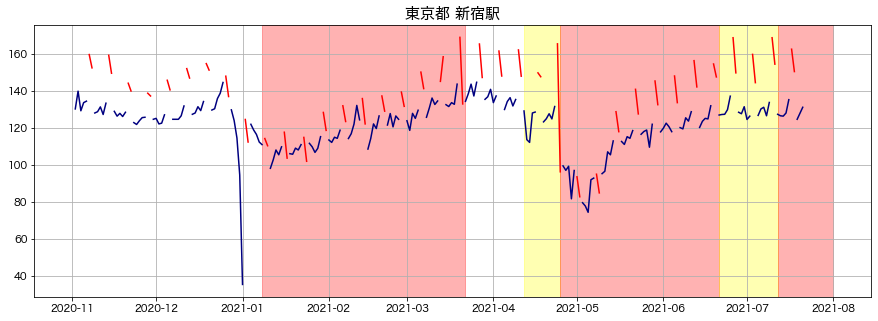

In [29]:
fig, ax = plt.subplots(figsize=(15,5))

ax.plot(df_pop['pop_weekday'], color='navy')
ax.plot(df_pop['pop_weekend'], color='red')

if area[:3] == '東京都':
    interval_tokyo(ax)
elif area[:3] == '大阪府':
    interval_osaka(ax)

ax.grid(True)
# ax.set_ylim(70, None)

if area  == "東京都 霞が関":
    date_0519 = datetime.datetime(2021, 5, 19)
    ax.axvline(date_0519, color='gray')

ax.set_title(area, fontsize=15)
fig.savefig(f"{area}.png")

In [30]:
# 線をつなげてみたけど、わかりにくいね。微妙

# fig, ax = plt.subplots(figsize=(15,5))

# ax.plot(df_pop.dropna(subset=['pop_weekday'])['pop_weekday'], color='navy')
# ax.plot(df_pop.dropna(subset=['pop_weekend'])['pop_weekend'], color='red')

# if area[:3] == '東京都':
#     interval_tokyo(ax)
# elif area[:3] == '大阪府':
#     interval_osaka(ax)

# ax.grid(True)
